<a href="https://colab.research.google.com/github/Iriansr/GrapheneQNR/blob/master/zz_functionalstudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code for functional study of dependance between vacancies and conductance in ZZGNR
## For use (i=0,ø,1 for systems 0,1,2):
- Change longitude and width of the 3 systems changing the code:
```
# syst(i), leads = make_system0(l=10,w = 5, pot = 0.1)
```
- Set vacancies with the code:
```
# del systi[ai(2,1)]
```
## Results obtained for further analysis with other libraries/languajes:
- position0.csv : csv-format file with positions of the atoms in the lattice.
- datai.csv : csv-format files with conductance for each systems.


In [0]:
!pip install kwant
from math import pi, sqrt, tanh
from matplotlib import pyplot as plt
import kwant
import numpy as np
from numpy import savetxt
import csv
import pandas as pd
import os

Subred A: 

[(-4, 8), (-3, 6), (-3, 7), (-3, 8), (-2, 4), (-2, 5), (-2, 6), (-2, 7), (-2, 8), (-1, 2), (-1, 3), (-1, 4), (-1, 5), (-1, 6), (-1, 7), (-1, 8), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (8, 1), (8, 2), (8, 3), (8, 4), (9, 1), (9, 2)]
Subred B: 

[(-3, 6), (-3, 7), (-2, 4), (-2, 5), (-2, 6), (-2, 7), (-1, 2), (-1, 3), (-1, 4), (-1, 5), (-1, 6), (-1, 7), (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2

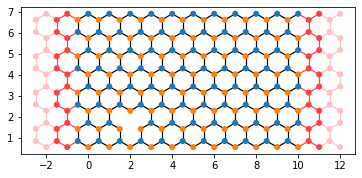

Sistema 2:


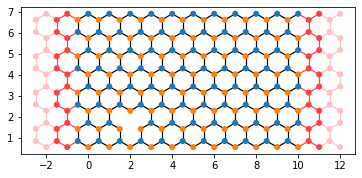

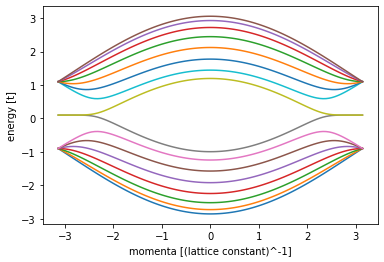

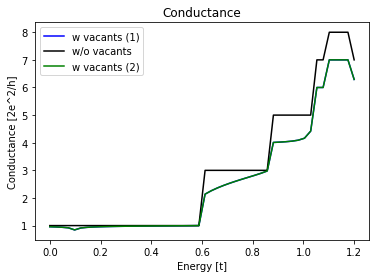

Porcentaje sistema 1 = 9.010586635406334 % 

Porcentaje sistema 2 = 9.010586635406334 % 



Text(0.5, 1.0, '% diference for energy values')

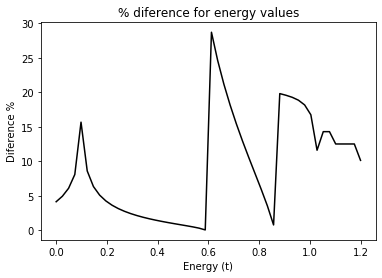

In [12]:
# define lattices and sublattices
graphene = kwant.lattice.honeycomb(norbs=1)   # modified lattice
graphene0 = kwant.lattice.honeycomb(norbs=1)  # pure lattice; from now on 0 at the end means no vacants.
graphene1 = kwant.lattice.honeycomb(norbs=1)
a0, b0 = graphene0.sublattices
a, b = graphene.sublattices
a1 ,b1 = graphene1.sublattices

# system 1
syst0= kwant.Builder()
def make_system0(l = 10, w = 10, pot = 0.1):
    def nrb(pos):
        (x,y) = pos
        return 0 <= x <= l and 0.5 <= y <=w
    def potential(site):                        
        (x,y) = site.pos
        return pot    
    syst0[graphene0.shape(nrb, (0, 0))] = potential 
    hoppings = ()
    syst0[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = -1
    syst0[graphene.neighbors()] = -1
    sym0 = kwant.TranslationalSymmetry((-1,0))      
    sym0.add_site_family(a0, other_vectors= [(-1,2)]) 
    sym0.add_site_family(b0, other_vectors= [(-1,2)]) 
    lead = kwant.Builder(sym0)
    def lead_shape(pos):
        (x,y) = pos
        return 0.5 <= y <= w
    lead[graphene0.shape(lead_shape, (1,1))] = pot
    lead[graphene0.neighbors()] = -1
    return syst0, [lead, lead.reversed()]
syst0, leads = make_system0(l=10,w = 7.5, pot = 0.1)
# lists, % preparation etc.
nods_list = list(syst0.sites())    
df = pd.DataFrame(nods_list)
df.columns = ['Lattice', 'site']
df = df.astype({"Lattice": str})
dfb0 = df.loc[df['Lattice'] == '<Monatomic lattice 1 with 1 orbitals>']
b0_site = dfb0.iloc[:,1:].values
dfa0 = df.loc[df['Lattice'] == '<Monatomic lattice 0 with 1 orbitals>']
a0_site = dfa0.iloc[:,1:].values
a0_list = []
b0_list = []
for i in range (0,len(a0_site)): a0_list.append(tuple(a0_site[i][0]))
for i in range (0,len(b0_site)): b0_list.append(tuple(b0_site[i][0]))
# finalization
for lead in leads:
    syst0.attach_lead(lead)
syst0 = syst0.finalized()
conductance0 = []
energies = np.linspace(0, 1.2)
for energy in energies:
    smatrix0 = kwant.smatrix(syst0, energy)
    conductance0.append(smatrix0.transmission(0,1))
savetxt('conductance0.csv', conductance0, delimiter=',')
position0 = np.array([syst0.pos(i) for i in range(syst0.graph.num_nodes)])
savetxt('position0.csv', position0, delimiter=',')

    # system 2
syst = kwant.Builder()
def make_system(l = 10, w = 10, pot = 0.1):
    def nrb(pos):
        (x,y) = pos
        return 0 <= x <= l and 0.5 <= y <=w
    def potential(site):                        
        (x,y) = site.pos
        return pot    
    syst[graphene.shape(nrb, (0, 0))] = potential 
    hoppings = ()
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = -1
    syst[graphene.neighbors()] = -1
# vacants
    del syst[a(1,2)]
    sym = kwant.TranslationalSymmetry((-1,0))      
    sym.add_site_family(a, other_vectors= [(-1,2)]) 
    sym.add_site_family(b, other_vectors= [(-1,2)]) 
    lead = kwant.Builder(sym)
    def lead_shape(pos):
        (x,y) = pos
        return 0.5 <= y <= w
    lead[graphene.shape(lead_shape, (1,1))] = pot
    lead[graphene.neighbors()] = -1
    return syst, [lead,lead.reversed()]
syst, leads = make_system(l=10,w = 7.5, pot = 0.1)
for lead in leads:
    syst.attach_lead(lead)
syst = syst.finalized()



# system 3
syst1 = kwant.Builder()
def make_system(l = 10, w = 10, pot = 0.1):
    def nrb(pos):
        (x,y) = pos
        return 0 <= x <= l and 0.5 <= y <=w
    def potential(site):                        
        (x,y) = site.pos
        return pot    
    syst1[graphene1.shape(nrb, (0, 0))] = potential 
    hoppings = ()
    syst1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = -1
    syst1[graphene.neighbors()] = -1
# vacants
    del syst1[a1(1,2)]
    sym1 = kwant.TranslationalSymmetry((-1,0))      
    sym1.add_site_family(a1, other_vectors= [(-1,2)]) 
    sym1.add_site_family(b1, other_vectors= [(-1,2)]) 
    lead = kwant.Builder(sym1)
    def lead_shape(pos):
        (x,y) = pos
        return 0.5 <= y <= w
    lead[graphene1.shape(lead_shape, (1,1))] = pot
    lead[graphene1.neighbors()] = -1
    return syst1, [lead,lead.reversed()]
syst1, leads = make_system(l=10,w = 7.5, pot = 0.1)
for lead in leads:
    syst1.attach_lead(lead)
syst1 = syst1.finalized()

## common: representation and stuff:

def plot_conductance(syst, energies):
    # transmission as function of energy
    data = []
    data0 = []
    data1 = []
    for energy in energies:
        smatrix = kwant.smatrix(syst, energy)    
        data.append(smatrix.transmission(0, 1))
    for energy in energies:
        smatrix0 = kwant.smatrix(syst0, energy)
        data0.append(smatrix0.transmission(0,1))
    for energy in energies:
        smatrix1 = kwant.smatrix(syst1, energy)
        data1.append(smatrix1.transmission(0,1))

    savetxt('data.csv', data, delimiter=',')   # data for vacant lattice
    savetxt('data0.csv', data0, delimiter=',') # data for perfect lattice
    savetxt('data1.csv', data1, delimiter=',')

    plt.figure()
    plt.plot(energies, data, 'b', label = 'w vacants (1)')
    plt.plot(energies, data0, 'k', label = 'w/o vacants')
    plt.plot(energies, data1, 'g', label = 'w vacants (2)')
    plt.xlabel("Energy [t]")
    plt.ylabel("Conductance [2e^2/h]")
    plt.title('Conductance')
    plt.legend()
    plt.show();

# Bandstructure
def plot_bandstructure(flead, momenta):
    bands = kwant.physics.Bands(flead)
    energies = [bands(k) for k in momenta]
    plt.figure()
    plt.plot(momenta, energies)
    plt.xlabel("momenta [(lattice constant)^-1]")
    plt.ylabel("energy [t]")
    plt.show()

def getKey(item):
     return item[0]
a_sort = sorted(a0_list, key=getKey)
b_sort = sorted(b0_list, key=getKey)
print("Subred A: \n")
print(a_sort)
print("Subred B: \n")
print(b_sort)

# Plotting the system
print("Sistema 1:")
kwant.plot(syst);
print("Sistema 2:")
kwant.plot(syst1);
# kwant.plot(syst0); for ribbon w/o vacants
# Plotting band structure of lead 0 (left)
momenta = [-pi + 0.02 * pi * i for i in range(101)]
plot_bandstructure(syst.leads[0], momenta);
# Plotting conductance
plot_conductance(syst, energies = np.linspace(0, 1.2));
# Plotting the system
# Plotting band structure of lead 0 (left)
momenta = [-pi + 0.02 * pi * i for i in range(101)]
## comparison of values 
# transforming csv to arrays (len() == 50)
d0_a = np.genfromtxt('data0.csv',delimiter = ',')
d_a = np.genfromtxt('data.csv', delimiter= ',')
d_a1 = np.genfromtxt('data1.csv', delimiter =',')
# substracting arrays so A-B=C and % dif = C/A since d0_a > d_a always
p_dif = np.divide(np.subtract(d0_a,d_a),d0_a)  # C/A
p_dif1 = np.divide(np.subtract(d0_a,d_a1),d0_a)
p_dif[np.isnan(p_dif)]=0
p_dif1[np.isnan(p_dif)]=0                      # replazing nan (0/0) with 0
print("Porcentaje sistema 1 = " + str(sum(p_dif)*10/5) + " % \n" )
print("Porcentaje sistema 2 = " + str(sum(p_dif1)*10/5) + " % \n" )
plt.figure()
plt.plot(np.linspace(0, 1.2),p_dif*100, 'k')
plt.xlabel("Energy (t)")
plt.ylabel("Diference %")
plt.title('% diference for energy values')